In [7]:
from models.ffnn import BrainFFNN
from models.vgg import BrainVGG
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
ffnn = BrainFFNN()

c:\Users\matty\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\matty\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [9]:
ffnn.train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
# hist = ffnn.train(epochs=12)
loaded = True
try:
    ffnn.load()
except:
    hist = ffnn.train(epochs=12)
    loaded = False

c:\Users\matty\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [23]:
ffnn.eval()

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7682 - loss: 14.9967 


In [24]:
X1 = [(x[0],x[1]) for x in ffnn.test_ds.as_numpy_iterator()]

X, labels = np.array(X1[0][0]), np.array(X1[0][1])

for i in range(1, len(X1)):
    X = np.concatenate((X, X1[i][0]))
    labels = np.concatenate((labels, X1[i][1]))
    
prediction_probabilities = ffnn.model.predict(X)
predicted_labels = prediction_probabilities.argmax(axis=1)

41/41 [==============================] - 0s 4ms/step


In [25]:
ffnn_output = classification_report(predicted_labels, labels, output_dict=True)
print(classification_report(predicted_labels, labels))

              precision    recall  f1-score   support

           0       0.43      0.87      0.57       147
           1       0.64      0.67      0.65       292
           2       1.00      0.74      0.85       541
           3       0.95      0.86      0.91       331

    accuracy                           0.77      1311
   macro avg       0.75      0.79      0.75      1311
weighted avg       0.84      0.77      0.79      1311



In [20]:
def plot_results(output, class_names, title):
    measurements = [("precision", "Precision"), ("recall", "Recall"), ("f1-score", "F1 Score")]
    classes = class_names
    data = [[] for i in range(len(measurements))]

    for i in range(len(classes)):
        classNumber = str(i)
        for measurement_i in range(len(measurements)):
            data[measurement_i].append(output[classNumber][measurements[measurement_i][0]])

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    fig.suptitle(title, fontsize=16)
    for measurement_i in range(len(measurements)):
        curr_ax = ax[measurement_i]
        measurement = measurements[measurement_i]
        curr_ax.bar(classes, data[measurement_i])
        curr_ax.set_ylim(0,1)
        curr_ax.set_title(measurement[1])
        curr_ax.set_xlabel("Label")
        curr_ax.set_ylabel("Score")
    plt.plot()

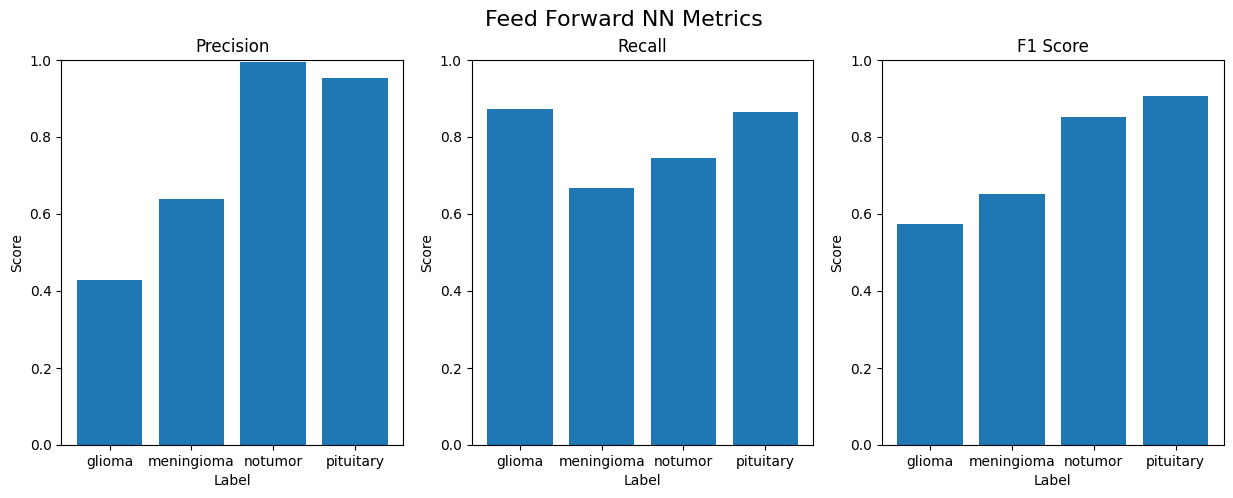

In [27]:
plot_results(ffnn_output, ffnn.test_ds.class_names, "Feed Forward NN Metrics")

In [28]:
# Only has the data to show hist if weights were not loaded
if not loaded:
    pd.DataFrame(hist.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

In [29]:
ffnn.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               16777472  
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 16810884 (64.13 MB)
Trainable params: 16810884 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
if not loaded:
    ffnn.save()

In [10]:
vgg = BrainVGG()

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [24]:
loaded = True
try:
    vgg.load()
except:
    hist = vgg.train(epochs=20)
    loaded = False

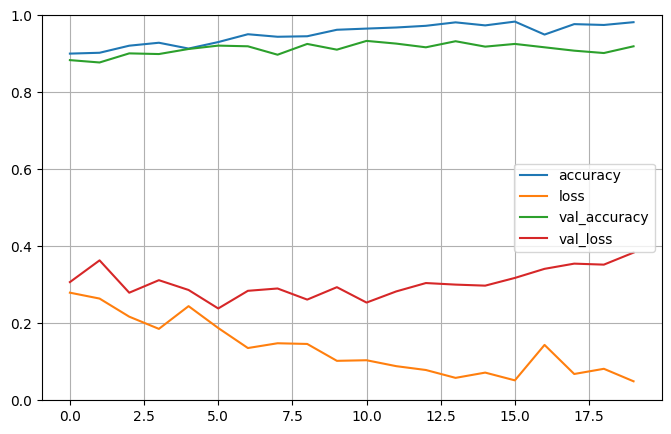

In [13]:
if not loaded:
    pd.DataFrame(hist.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

In [14]:
vgg.model.summary()
if not loaded:
    vgg.save()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   134,221,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 513,128,270 (1.91 GB)

 Trainable params: 171,042,756 (652.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 342,085,514 (1.27 GB)

In [25]:
X1 = [(x[0],x[1]) for x in vgg.test_ds.as_numpy_iterator()]

X, labels = np.array(X1[0][0]), np.array(X1[0][1])

for i in range(1, len(X1)):
    X = np.concatenate((X, X1[i][0]))
    labels = np.concatenate((labels, X1[i][1]))
    
prediction_probabilities = vgg.model.predict(X)
predicted_labels = prediction_probabilities.argmax(axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step


In [28]:
# Generates a classification report on the first batch of images
output = classification_report(labels, predicted_labels, output_dict=True)
print(classification_report(labels, predicted_labels))

print(output)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       300
           1       0.84      0.82      0.83       306
           2       0.97      0.99      0.98       405
           3       0.99      0.96      0.97       300

    accuracy                           0.92      1311
   macro avg       0.92      0.91      0.91      1311
weighted avg       0.92      0.92      0.92      1311

{'0': {'precision': 0.8548387096774194, 'recall': 0.8833333333333333, 'f1-score': 0.8688524590163934, 'support': 300.0}, '1': {'precision': 0.8445945945945946, 'recall': 0.8169934640522876, 'f1-score': 0.8305647840531561, 'support': 306.0}, '2': {'precision': 0.9710144927536232, 'recall': 0.9925925925925926, 'f1-score': 0.9816849816849816, 'support': 405.0}, '3': {'precision': 0.9896907216494846, 'recall': 0.96, 'f1-score': 0.9746192893401016, 'support': 300.0}, 'accuracy': 0.9191456903127384, 'macro avg': {'precision': 0.9150346296687805, 'recall': 0.9132298

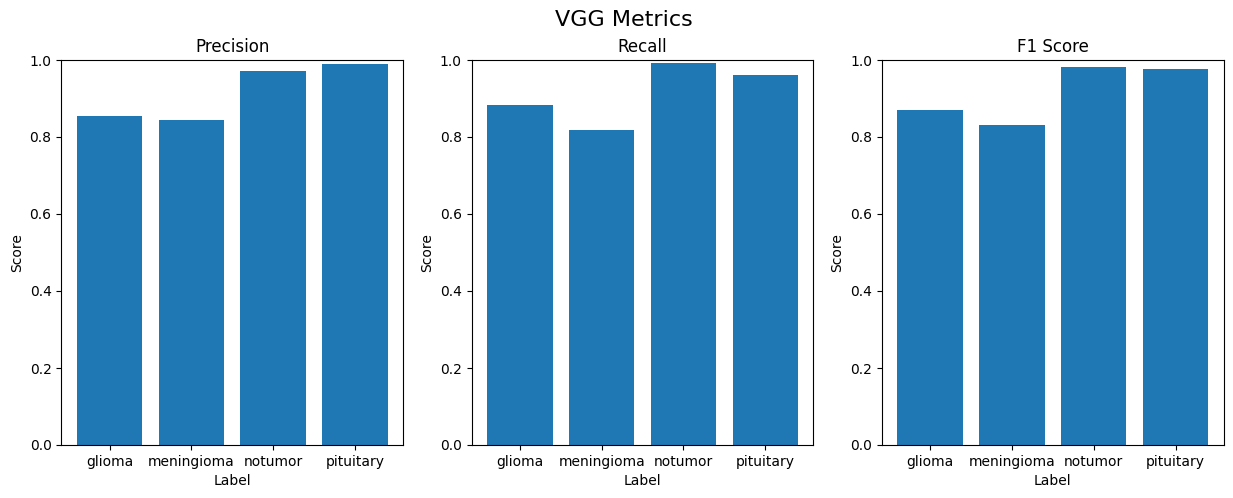

In [27]:
plot_results(output, vgg.test_ds.class_names, "VGG Metrics")
